In [1]:
import os
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
import IPython
import IPython.display

In [3]:
df=pd.read_csv("183063.csv")
#date_time = pd.to_datetime(df.pop('TIMESTAMP'), format='%Y-%m-%dT%H:%M:%S')
df.drop(columns=['extID','REPORT_ID','_id','Unnamed: 0','Min','status','medianMeasuredTime'],inplace=True)
df.head()

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,M,D,H
0,86,48,2014-02-13T11:30:00,4,2,13,11
1,91,45,2014-02-13T11:35:00,3,2,13,11
2,105,39,2014-02-13T11:40:00,7,2,13,11
3,112,36,2014-02-13T11:45:00,10,2,13,11
4,97,42,2014-02-13T11:50:00,8,2,13,11


In [4]:
df3 = pd.DataFrame(columns=df.columns)
#from 5min to 1hour
for m in df['M'].unique():
    for d in df['D'].unique():
        for h in df['H'].unique():
            DDD=df[(df['H'] == h)&(df['D'] == d)&(df['M'] == m)]
            if DDD['avgSpeed'].mean() > 0:
                #print([[DDD['avgMeasuredTime'].mean(),DDD['avgSpeed'].mean(),DDD['vehicleCount'].sum(),DDD['M'].mean(),DDD['D'].mean(),DDD['H'].mean()]])
                df4=pd.DataFrame([[DDD['avgMeasuredTime'].mean(),DDD['avgSpeed'].mean(),DDD['TIMESTAMP'].values[0],
                                   DDD['vehicleCount'].sum(),DDD['M'].mean(),DDD['D'].mean(),DDD['H'].mean()]],
                                     columns=df.columns.tolist())
                df3=pd.concat([df3,df4],ignore_index=True)

#extract datetime from timestamp
date_time = pd.to_datetime(df3.pop('TIMESTAMP'), format='%Y-%m-%dT%H:%M:%S')

In [5]:
df=df3
df['vehicleCount']=df['vehicleCount'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avgMeasuredTime  5028 non-null   float64
 1   avgSpeed         5028 non-null   float64
 2   vehicleCount     5028 non-null   int32  
 3   M                5028 non-null   float64
 4   D                5028 non-null   float64
 5   H                5028 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 216.2 KB


In [6]:
df.drop(columns=['M','D','H'],inplace=True)
df.head()

,avgMeasuredTime,avgSpeed,vehicleCount
0,94.333333,44.166667,37
1,104.750000,39.666667,99
2,111.333333,37.416667,136
3,128.500000,32.083333,150
4,107.250000,39.250000,125


In [6]:
df=pd.read_csv("183063.csv")
#df.drop(columns= "Unnamed: 0",axis=1,inplace= True)
df.info()
df1=df[df['Min']==0]
df.drop(columns=['extID','REPORT_ID','_id','Unnamed: 0','M','D','H','Min','status','medianMeasuredTime'],inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55707 entries, 0 to 55706
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          55707 non-null  int64 
 1   status              55707 non-null  object
 2   avgMeasuredTime     55707 non-null  int64 
 3   avgSpeed            55707 non-null  int64 
 4   extID               55707 non-null  int64 
 5   medianMeasuredTime  55707 non-null  int64 
 6   TIMESTAMP           55707 non-null  object
 7   vehicleCount        55707 non-null  int64 
 8   _id                 55707 non-null  int64 
 9   REPORT_ID           55707 non-null  int64 
 10  M                   55707 non-null  int64 
 11  D                   55707 non-null  int64 
 12  H                   55707 non-null  int64 
 13  Min                 55707 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 6.0+ MB


,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount
0,86,48,2014-02-13T11:30:00,4
1,91,45,2014-02-13T11:35:00,3
2,105,39,2014-02-13T11:40:00,7
3,112,36,2014-02-13T11:45:00,10
4,97,42,2014-02-13T11:50:00,8


In [6]:
df=df3
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avgMeasuredTime,5028.0,102.042298,17.592316,46.0,91.833333,102.75,112.666667,254.5
avgSpeed,5028.0,42.829511,8.129343,18.0,37.567460,41.25,46.363636,90.0
M,5028.0,6.335720,2.871192,2.0,4.000000,6.00,9.000000,11.0
D,5028.0,15.233691,8.904109,1.0,7.000000,15.00,23.000000,31.0
H,5028.0,11.473747,6.905390,0.0,5.000000,11.00,17.000000,23.0


In [8]:
date_time = pd.to_datetime(df.pop('TIMESTAMP'), format='%Y-%m-%dT%H:%M:%S')
date_time

0       2014-02-13 11:30:00
1       2014-02-13 11:35:00
2       2014-02-13 11:40:00
3       2014-02-13 11:45:00
4       2014-02-13 11:50:00
                ...        
55702   2014-11-13 10:20:00
55703   2014-11-13 10:25:00
55704   2014-11-13 10:30:00
55705   2014-11-13 10:35:00
55706   2014-11-13 10:40:00
Name: TIMESTAMP, Length: 55707, dtype: datetime64[ns]

In [7]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
#df['Weekday'] = [datetime.weekday(date) for date in date_time]
#df["IsWeekend"] = df["Weekday"] >= 5

df.head()
timestamp_s

0       1.392291e+09
1       1.392293e+09
2       1.392296e+09
3       1.392300e+09
4       1.392304e+09
            ...     
5023    1.415772e+09
5024    1.415776e+09
5025    1.415779e+09
5026    1.415783e+09
5027    1.415786e+09
Name: TIMESTAMP, Length: 5028, dtype: float64

In [15]:
df.drop(columns=['Weekday'],inplace=True)

Text(0.5, 1.0, 'compareson entre datetime(hour) et')

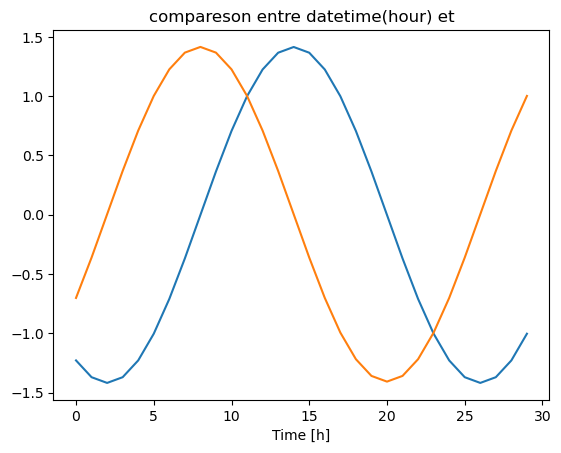

In [33]:
plt.plot(np.array(df['Day sin'])[18:48], label='Day sin')
plt.plot(np.array(df['Day cos'])[18:48], label='Day cos')
#plt.plot(np.array(df['H'])[18:48], label='hour')
plt.xlabel('Time [h]')
plt.title('compareson entre datetime(hour) et')

In [ ]:
plt.plot(np.array(df['Day sin'])[18:48])
plt.plot(np.array(df['Day cos'])[18:48])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [29]:
df

,avgMeasuredTime,avgSpeed,vehicleCount,M,D,H,Day sin,Day cos,Year sin,Year cos
0,-0.438201,0.164485,-0.208904,-1.510077,-0.250861,-0.068605,0.183409,-1.395105,0.742746,1.777563
1,0.153914,-0.389065,1.353849,-1.510077,-0.250861,0.076209,-0.001508,-1.407180,0.743052,1.777070
2,0.528130,-0.665840,2.286459,-1.510077,-0.250861,0.221023,-0.368176,-1.359085,0.743665,1.776081
3,1.503935,-1.321900,2.639339,-1.510077,-0.250861,0.365838,-0.709857,-1.218078,0.744277,1.775092
4,0.296021,-0.440320,2.009197,-1.510077,-0.250861,0.510652,-1.003265,-0.993768,0.744888,1.774102
...,...,...,...,...,...,...,...,...,...,...
5023,1.162877,-0.973368,0.547266,1.624510,-0.363168,-0.792677,1.415191,0.004296,-0.943896,1.631625
5024,0.878662,-0.778601,0.673295,1.624510,-0.363168,-0.647863,1.366919,-0.361021,-0.943344,1.632713
5025,-0.120827,-0.112290,0.597678,1.624510,-0.363168,-0.503049,1.225390,-0.701442,-0.942791,1.633801
5026,0.494972,-0.573582,0.496855,1.624510,-0.363168,-0.358234,1.000250,-0.993768,-0.942238,1.634887


In [8]:
#Normalize the data
mean = df.mean()
std = df.std()
df = (df - mean) / std
df.head()

,avgMeasuredTime,avgSpeed,vehicleCount,Day sin,Day cos,Year sin,Year cos
0,-0.438201,0.164485,-0.208904,0.183409,-1.395105,0.742746,1.777563
1,0.153914,-0.389065,1.353849,-0.001508,-1.407180,0.743052,1.777070
2,0.528130,-0.665840,2.286459,-0.368176,-1.359085,0.743665,1.776081
3,1.503935,-1.321900,2.639339,-0.709857,-1.218078,0.744277,1.775092
4,0.296021,-0.440320,2.009197,-1.003265,-0.993768,0.744888,1.774102


In [9]:
#Split the data
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.75)]        #75% train
val_df = df[int(n*0.75):int(n*0.9)] #15% validation
test_df = df[int(n*0.9):]           #10% test

num_features = df.shape[1]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avgMeasuredTime  5028 non-null   float64
 1   avgSpeed         5028 non-null   float64
 2   vehicleCount     5028 non-null   float64
 3   Day sin          5028 non-null   float64
 4   Day cos          5028 non-null   float64
 5   Year sin         5028 non-null   float64
 6   Year cos         5028 non-null   float64
dtypes: float64(7)
memory usage: 275.1 KB


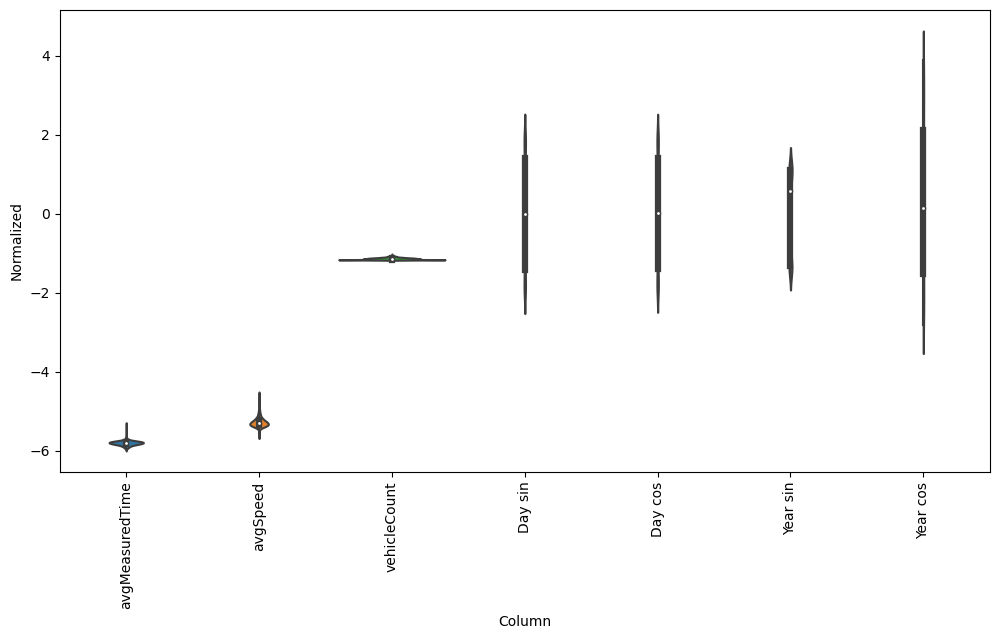

In [31]:
#no peaks
df_std = (df - mean) / std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

Data windowing

In [10]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

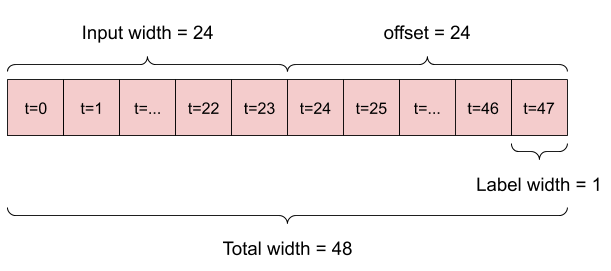

In [11]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['avgSpeed'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['avgSpeed']

In [12]:
#Split
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

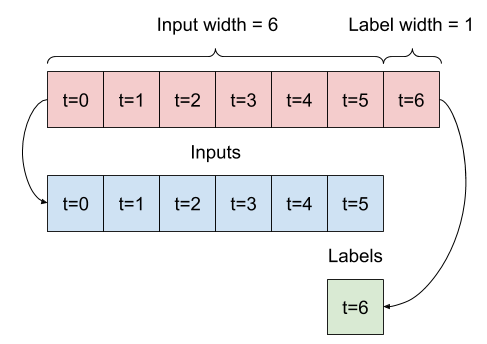

Create tf.data.Datasets

In [13]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [14]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [15]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

(TensorSpec(shape=(None, 24, 7), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [16]:
wide_window = WindowGenerator(
    input_width=12, label_width=1, shift=3,
    label_columns=['avgSpeed'])

Multi-step dense

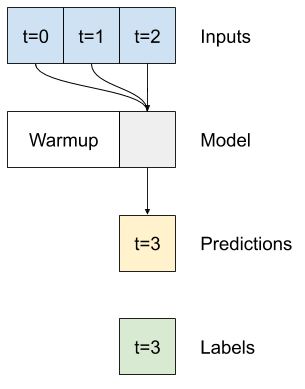

In [17]:
CONV_WIDTH = 12
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=3,
    label_columns=['avgSpeed'])

conv_window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [14]
Label column name(s): ['avgSpeed']

In [18]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=8,
    label_columns=['avgSpeed'])

wide_window

Total window size: 32
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Label column name(s): ['avgSpeed']

In [41]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [42]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 12, 7)
Output shape: (32, 1, 1)


In [23]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val)
  return history

#callbacks=[early_stopping]

In [19]:
val_performance = {}
performance = {}

In [54]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

24/24 [==============================] - 0s 4ms/step - loss: 1.1109 - mean_absolute_error: 0.7646


In [55]:
scores = multi_step_dense.evaluate(conv_window.test)
scores[1]*100

16/16 [==============================] - 0s 4ms/step - loss: 1.4910 - mean_absolute_error: 0.9206


92.06056594848633

In [64]:
print('Input', wide_window.example[0])
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output', multi_step_dense(wide_window.example[0]))
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input tf.Tensor(
[[[-1.2576872   1.6508701  -0.96507525 ...  1.2266701   0.7802325
    1.7143872 ]
  [-0.6182035   0.27724534 -1.0658981  ...  1.0023603   0.7808188
    1.7133532 ]
  [-1.6650621   1.7738812  -1.0911038  ...  0.710034    0.7814047
    1.7123183 ]
  ...
  [-1.7076943   1.9891508  -1.0911038  ...  1.3676772   0.80618364
    1.667147  ]
  [-0.6276773   0.26699442 -1.1415151  ...  1.4157721   0.79303056
    1.6914716 ]
  [-0.6276773   0.26699442 -1.1415151  ...  1.3676772   0.7936073
    1.6904218 ]]

 [[-0.8395467   0.6695764   0.06835816 ...  0.710034   -1.2250118
    0.08690891]
  [ 1.1060342  -1.1373831   0.74891186 ...  0.36961284 -1.2251045
    0.08834334]
  [ 0.43339202 -0.52232724  0.5976777  ...  0.00429595 -1.2251964
    0.08977788]
  ...
  [-0.927395    0.5912966  -1.1415151  ...  1.3676772  -1.2268296
    0.11705475]
  [-1.0729475   0.9640577  -1.0911038  ...  1.2266701  -1.2269096
    0.11849141]
  [-0.9434718   0.7317033  -1.0406923  ...  1.0023603  -1.226989


In [20]:
def plot(self, model=None, plot_col='avgSpeed', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [H]')

WindowGenerator.plot = plot

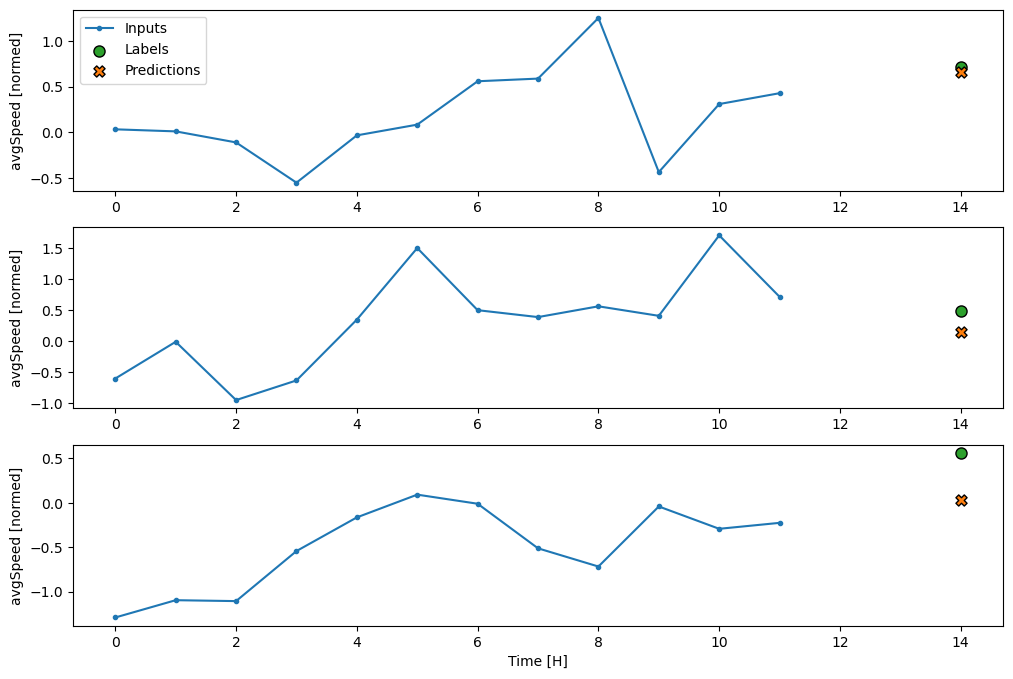

In [65]:
conv_window.plot(multi_step_dense)

In [54]:
#wide_window.plot(multi_step_dense)

Recurrent neural network

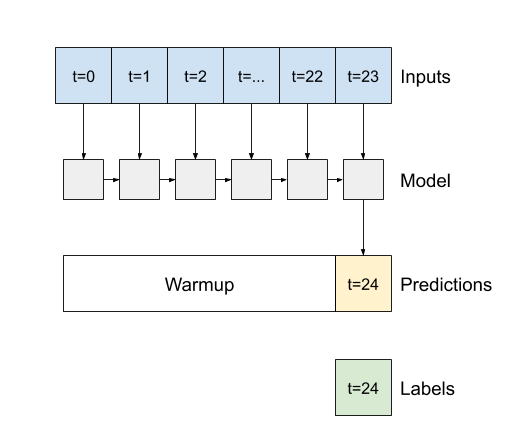

In [21]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=6)])

In [27]:
MAX_EPOCHS=100
history = compile_and_fit(lstm_model, wide_window)
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
117/117 [==============================] - 3s 12ms/step - loss: 0.4429 - mean_absolute_error: 0.4770 - val_loss: 0.8832 - val_mean_absolute_error: 0.6476
Epoch 2/100
117/117 [==============================] - 1s 8ms/step - loss: 0.4376 - mean_absolute_error: 0.4745 - val_loss: 0.8843 - val_mean_absolute_error: 0.6484
Epoch 3/100
117/117 [==============================] - 1s 8ms/step - loss: 0.4317 - mean_absolute_error: 0.4715 - val_loss: 0.8938 - val_mean_absolute_error: 0.6515
Epoch 4/100
117/117 [==============================] - 1s 8ms/step - loss: 0.4277 - mean_absolute_error: 0.4696 - val_loss: 0.8783 - val_mean_absolute_error: 0.6476
Epoch 5/100
117/117 [==============================] - 1s 9ms/step - loss: 0.4223 - mean_absolute_error: 0.4669 - val_loss: 0.8888 - val_mean_absolute_error: 0.6502
Epoch 6/100
117/117 [==============================] - 1s 9ms/step - loss: 0.4179 - mean_absolute_error: 0.4643 - val_loss: 0.8949 - val_mean_absolute_error: 0.6528
Epoch 7/1

In [28]:
performance['LSTM'][1]*100

89.54657316207886

In [30]:
lstm_model.save('lstmmodel5')

INFO:tensorflow:Assets written to: lstmmodel5\assets


INFO:tensorflow:Assets written to: lstmmodel5\assets


In [31]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 32)            5120      
                                                                 
 dense (Dense)               (None, 24, 6)             198       
                                                                 
Total params: 5,318
Trainable params: 5,318
Non-trainable params: 0
_________________________________________________________________


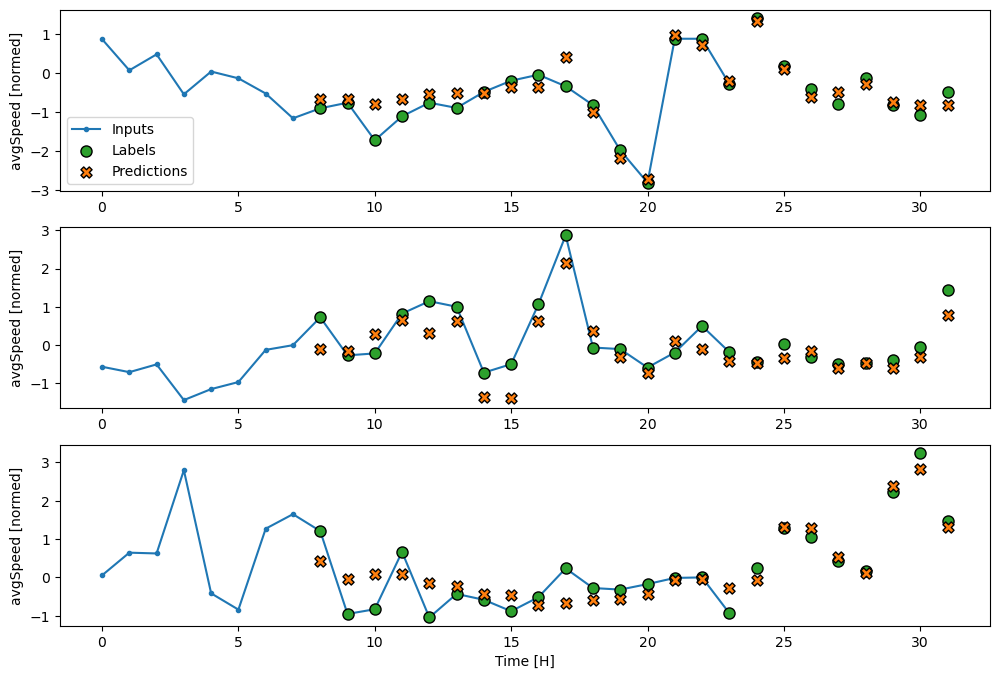

In [85]:
wide_window.plot(lstm_model)

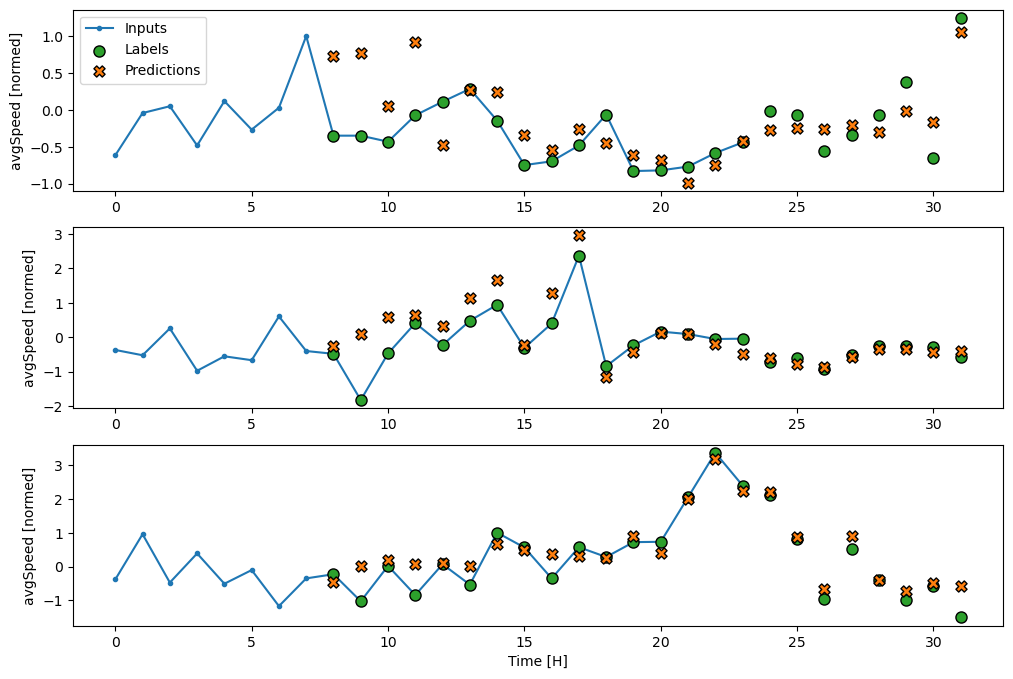

In [32]:
wide_window.plot(lstm_model)

Total window size: 36
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35]
Label column name(s): None

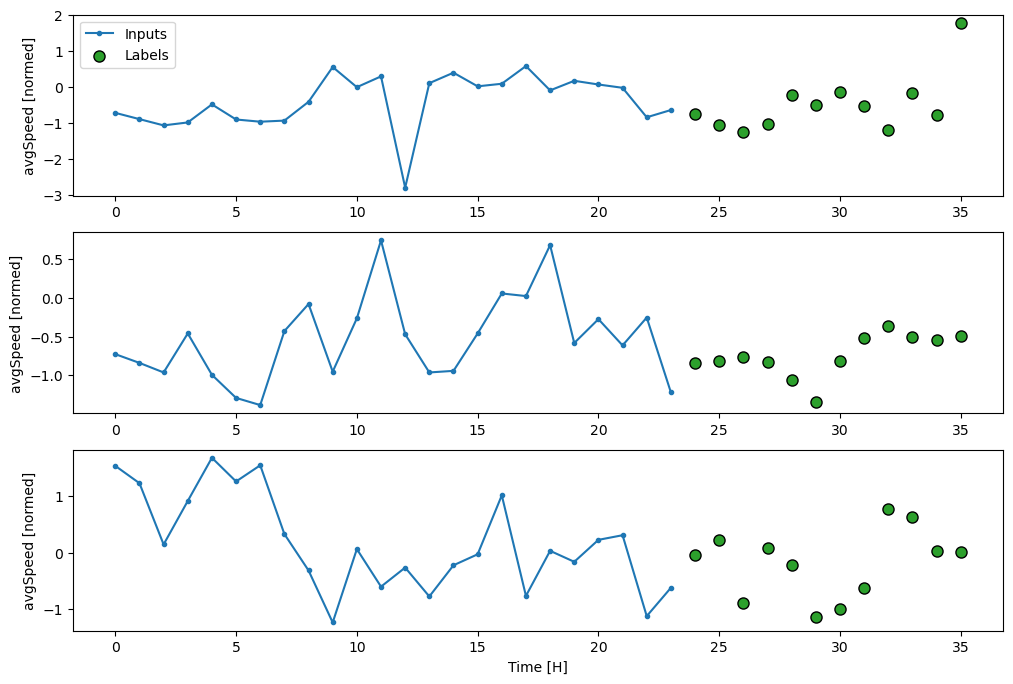

In [63]:
multi_val_performance = {}
multi_performance = {}
OUT_STEPS = 12
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

23/23 [==============================] - 0s 5ms/step - loss: 0.3262 - mean_absolute_error: 0.3321


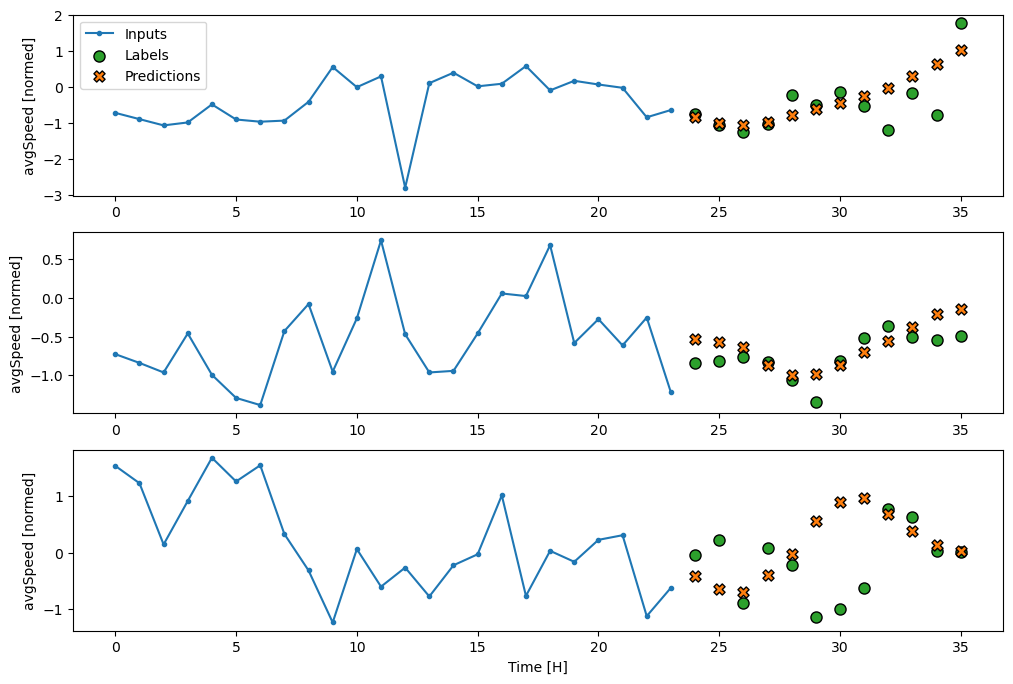

In [64]:
MAX_EPOCHS=100
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [68]:
scores = multi_lstm_model.evaluate(multi_window.test)
scores[1]*100

15/15 [==============================] - 0s 7ms/step - loss: 0.4858 - mean_absolute_error: 0.4590


45.90110778808594

In [1]:
multi_window.plot(multi_lstm_model)

NameError: name 'multi_window' is not defined